In [1]:
# import matplotlib
%matplotlib inline
import matplotlib as mlp
# set figure size
mlp.rcParams['figure.figsize'] = 10, 15
from matplotlib.pyplot import imshow

In [2]:
# import image manipulation
import rawpy
import numpy as np

uint8 (3040, 4056, 3)


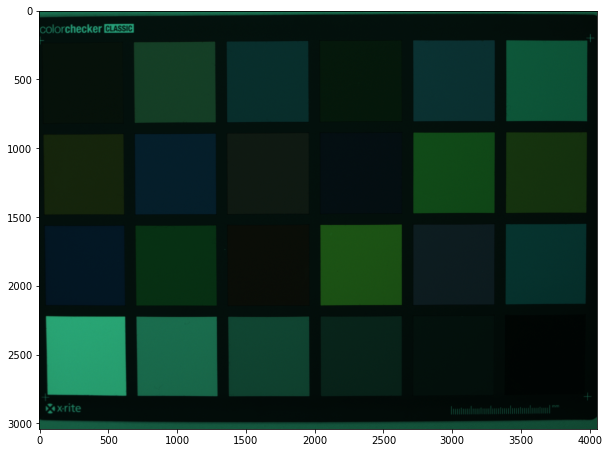

In [3]:
# read image
raw = rawpy.imread("./hq_cam_color_checker_new.dng")
array = raw.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1,1),
                        user_wb=[1.0,1.0,1.0,1.0], no_auto_bright=True)
# show raw image
imshow(array)
# datatype, imagehsape
print(array.dtype, array.shape)

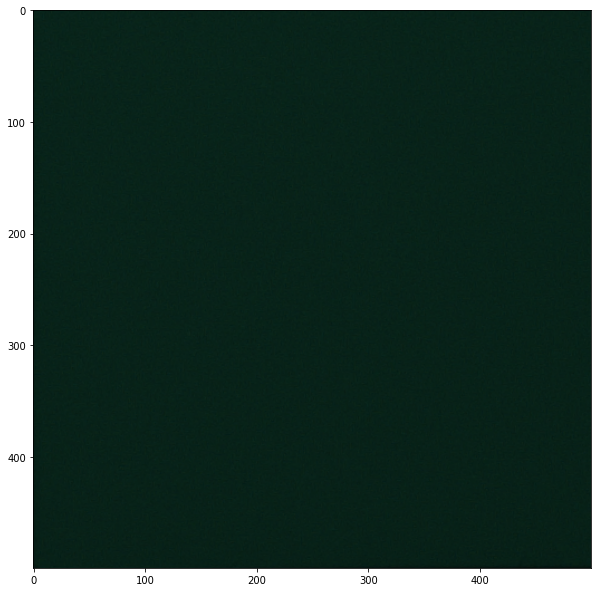

In [4]:
# crop a field of the color checker out of the image
array_crop = array[2300:2800, 2050:2550] # grey field #D4
# field 4 last line [y1:y2,x1:x2] 500x500
imshow(array_crop)

In [5]:
# calculate mean values for the cropped field
r_mean = np.mean(array_crop[:,:,0])
g_mean = np.mean(array_crop[:,:,1])
b_mean = np.mean(array_crop[:,:,2])
print(r_mean, g_mean, b_mean)

8.128796 34.434416 25.018892


In [6]:
# get white balance
base_wb = [g_mean/r_mean, 1.0, g_mean/b_mean, 1.0]
print(base_wb)

[4.236102861973655, 1.0, 1.3763365699807968, 1.0]


In [7]:
# get brightness
base_brightness = 255/g_mean
print(base_brightness)
# 7,xx is to bright

7.405381871439318


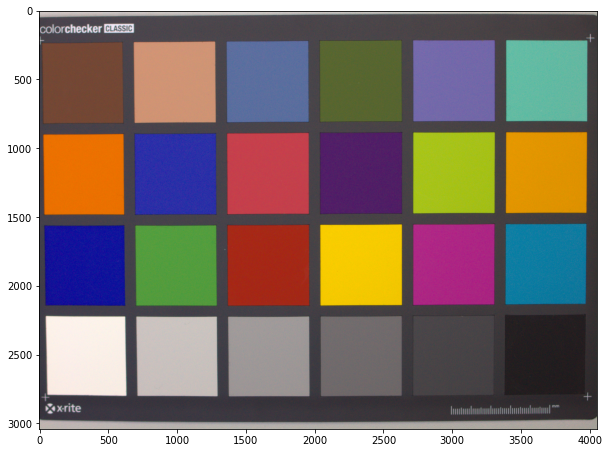

In [8]:
# correct image wiht white balance
array_corr = raw.postprocess(user_wb=base_wb)
imshow(array_corr)

111.910424 105.97908 107.280088


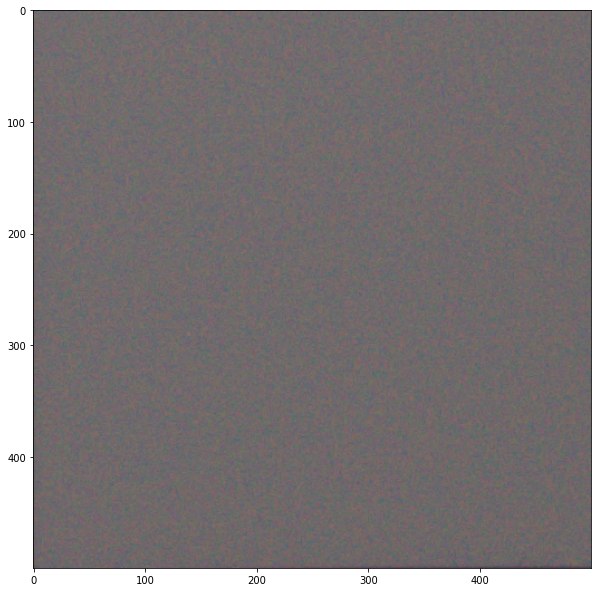

In [9]:
# crop field as before to check the corrected RGB values
array_crop_corr = array_corr[2300:2800, 2050:2550] # grey field #D4
# field 4 last line [y1:y2,x1:x2] 500x500
imshow(array_crop_corr)

# calculate RGB for on cropped and corrected grey field
r_mean_cc = np.mean(array_crop_corr[:,:,0])
g_mean_cc = np.mean(array_crop_corr[:,:,1])
b_mean_cc = np.mean(array_crop_corr[:,:,2])
print(r_mean_cc, g_mean_cc, b_mean_cc)
# target values [R=122,G=122,B=121]

In [10]:
# conver uint to int
rgb = array_corr
rgb = np.array(rgb)
print(rgb.dtype, rgb.shape)
rgb = rgb.astype(int)
print(rgb.dtype, rgb.shape)

uint8 (3040, 4056, 3)
int64 (3040, 4056, 3)


uint8 (3040, 4056, 3)


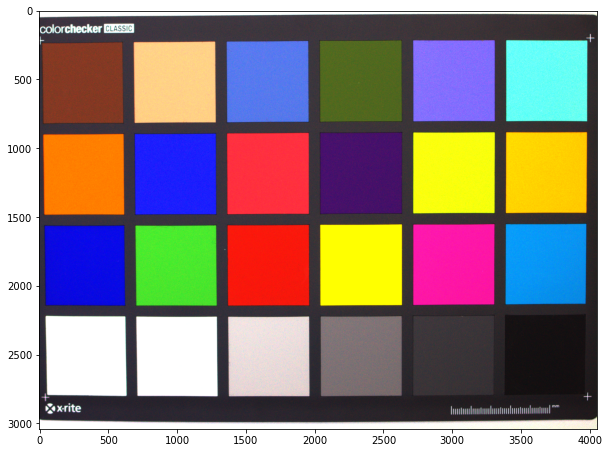

In [11]:
# process raw image with sRGB colorspace and more 
# estimate brightness to get target RGB values in the cropped image
new_rgb = raw.postprocess(output_color=rawpy.ColorSpace.sRGB, gamma=(1,1),
                        user_wb=base_wb, bright=3.3 ,no_auto_bright=True)
imshow(new_rgb)
print(new_rgb.dtype, new_rgb.shape)

124.714056 112.711276 115.23226


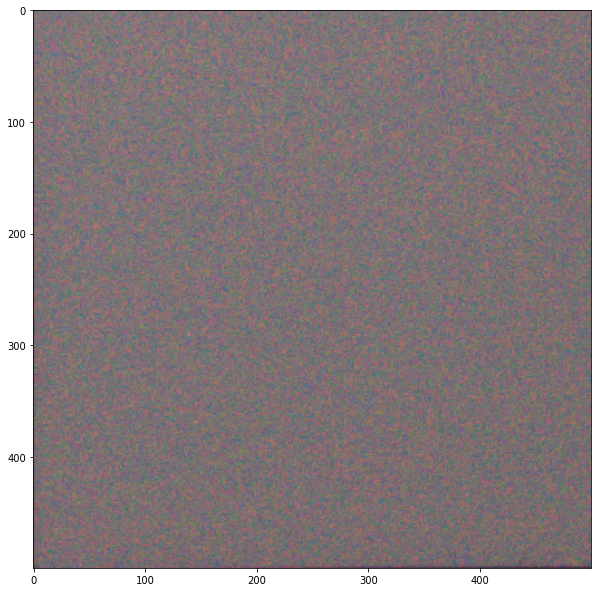

In [12]:
# crop the new array to check RGB values
new_rgb_crop_corr = new_rgb[2300:2800, 2050:2550] # grey field #D4
# field 4 last line [y1:y2,x1:x2] 500x500
imshow(new_rgb_crop_corr)

# calculate RGB for on cropped and corrected grey field
r_mean_ncc = np.mean(new_rgb_crop_corr[:,:,0])
g_mean_ncc = np.mean(new_rgb_crop_corr[:,:,1])
b_mean_ncc = np.mean(new_rgb_crop_corr[:,:,2])
print(r_mean_ncc, g_mean_ncc, b_mean_ncc)
# target values [R=122,G=122,B=121]